In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from conversiones import convertirNumero


produccion = pd.read_csv("PRODUCCION.csv")
desperdicio = pd.read_csv("DESPERDICIO.csv")
pedidos = pd.read_csv("PEDIDOS.csv")
empleados = pd.read_csv("EMPLEADOS.csv")
departamento = pd.read_csv("DEPARTAMENTOS.csv")



#CONVERSION
columnanNueva = list( map ( convertirNumero, produccion["PRODUCCION"] ))
produccion["PRODUCCION"] = columnanNueva



fechaInicio = f"{1:02d}/{1:02d}/{2023}"
fechaFinal = f"{31:02d}/{12:02d}/{2023}"


#calendariso

anio = 2023

# Crea un rango de fechas para todo el año
fecha_inicio = f"01-01-{anio}"
fecha_fin = f"31-12-{anio}"
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin)
calendario = pd.DataFrame({'FECHA': rango_fechas.strftime('%d-%m-%Y')})





HISTOGRAMA DE PRODUCCION X HORA

C:\Users\TEST\AppData\Local\Temp\ipykernel_3880\2472107806.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(produccionKilos, kde=False, norm_hist=False, bins=12, hist_kws={'edgecolor': 'black'}, color="red")


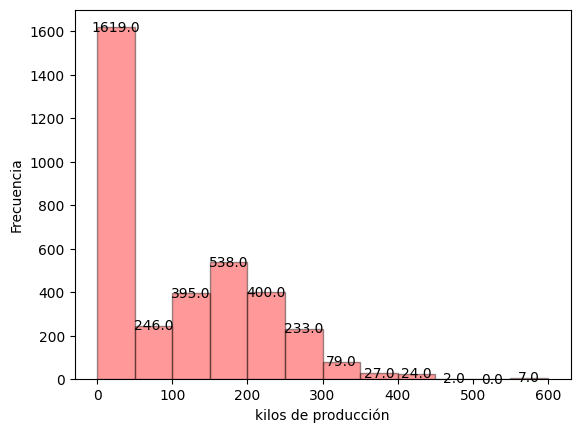

In [4]:
producciones = produccion[produccion["KILOS"] < 1000]

produccionKilos = producciones["KILOS"].dropna()

sns.distplot(produccionKilos, kde=False, norm_hist=False, bins=12, hist_kws={'edgecolor': 'black'}, color="red")
plt.xlabel('kilos de producción')
plt.ylabel('Frecuencia')


for p in plt.gca().patches:
    height = p.get_height() 
    plt.annotate( f'{height}',  (p.get_x() + p.get_width() / 2., height), ha='center', va='center')




<Axes: xlabel='ID_DEPARTAMENTO', ylabel='KILOS'>

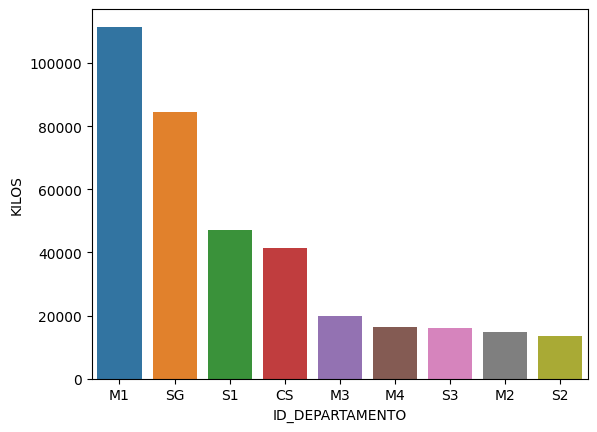

In [5]:

box = produccion.groupby(produccion["ID_DEPARTAMENTO"])["KILOS"].sum().reset_index()

box= box.sort_values(by="KILOS", ascending=False)

sns.barplot(data=box, x=box["ID_DEPARTAMENTO"], y=box["KILOS"])



<Axes: xlabel='KILOS', ylabel='PROPORCIONAL'>

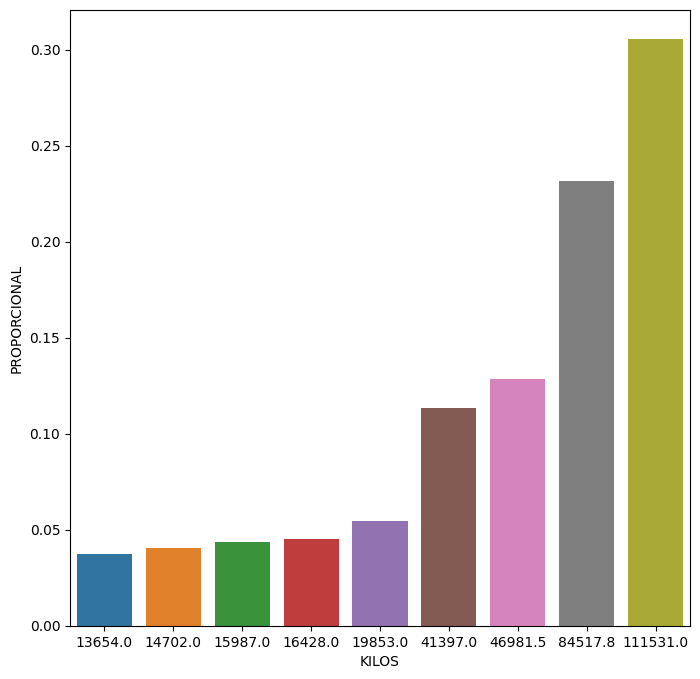

In [6]:
box['PROPORCIONAL'] = box['KILOS'] / box['KILOS'].sum()
box= box.sort_values(by='PROPORCIONAL', ascending=False)
plt.figure(figsize=(8, 8))
sns.barplot(data=box, x='KILOS', y='PROPORCIONAL')

<Axes: xlabel='DATOS PRODUCTIVOS POR ÁREA', ylabel='KILOS'>

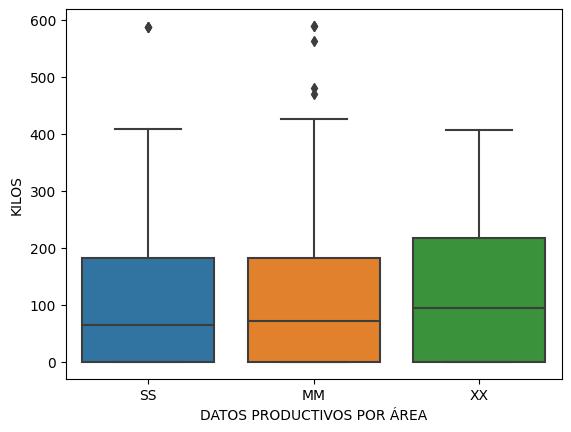

In [7]:
SS = produccion[produccion["ID_DEPARTAMENTO"].isin(["S1","S2","S3"])][["ID_DEPARTAMENTO","KILOS","PRODUCCION"]]
MM = produccion[produccion["ID_DEPARTAMENTO"].isin(["M1","M2","M3"])][["ID_DEPARTAMENTO","KILOS","PRODUCCION"]]
XX = produccion[produccion["ID_DEPARTAMENTO"].isin(["CS","XX"])][["ID_DEPARTAMENTO","KILOS","PRODUCCION"]]


SS["PRODUCCION"]= SS["PRODUCCION"].dropna()
MM["PRODUCCION"]= MM["PRODUCCION"].dropna()
XX["PRODUCCION"]= XX["PRODUCCION"].dropna()

SS["KILOS"]= SS["KILOS"].dropna()
MM["KILOS"]= MM["KILOS"].dropna()
XX["KILOS"]= XX["KILOS"].dropna()

SS["KILOS"] = SS["KILOS"].dropna()
data = pd.DataFrame({
    'SS': SS["KILOS"],
    'MM': MM["KILOS"],
    'XX': XX["KILOS"],
})

plt.xlabel("DATOS PRODUCTIVOS POR ÁREA")
plt.ylabel("KILOS")
sns.boxplot(data=data)




C:\Users\TEST\AppData\Local\Temp\ipykernel_3880\3664404646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turno1['KILOS'] = turno1['KILOS'].dropna()
C:\Users\TEST\AppData\Local\Temp\ipykernel_3880\3664404646.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turno2['KILOS'] = turno2['KILOS'].dropna()
C:\Users\TEST\AppData\Local\Temp\ipykernel_3880\3664404646.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot`

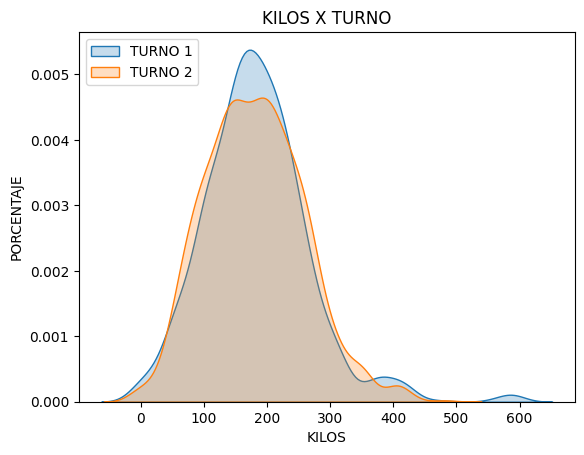

In [8]:
produccion["PRODUCCION"]  = pd.to_numeric(produccion["PRODUCCION"] )

turno1 = produccion[(produccion["TURNO"] == 1)& (produccion["PRODUCCION"] >=1)]
turno2 = produccion[(produccion["TURNO"] == 2 ) & (produccion["PRODUCCION"] >=1)]
turno1['KILOS'] = turno1['KILOS'].dropna()
turno2['KILOS'] = turno2['KILOS'].dropna()




ax = sns.distplot(turno1['KILOS'], hist=False, kde_kws = {'shade': True}, label='TURNO 1', bins=16)
ax = sns.distplot(turno2['KILOS'], hist=False, kde_kws = {'shade': True}, label='TURNO 2',bins=16)
ax.set(title='KILOS X TURNO', xlabel='KILOS', ylabel='PORCENTAJE')
ax.legend(loc='upper left'); #posicion del recuadro



Text(0.5, 1.0, 'Minutos de tiempo detenido agrupados')

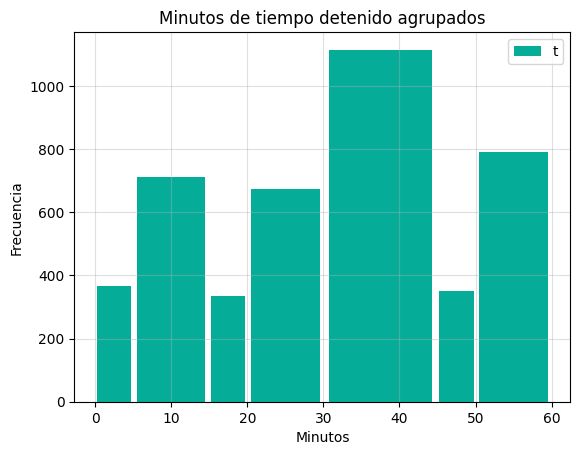

In [23]:
produccion


Minutos = produccion["TM 1"]

plt.hist(Minutos, bins = [0,5,15,20,30,45,50,60], color="#05ad99", rwidth=0.9)
plt.grid(axis="y", alpha=.4)
plt.grid(axis="x", alpha=.4)
plt.xlabel("Minutos")
plt.ylabel("Frecuencia")
plt.legend("tiempo parado")
plt.title("Minutos de tiempo detenido agrupados")



